#Spanish Wine Quality Classification Problem

Importing the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

#Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/wines_SPA.csv')
df
df_copy=df.copy()

In [3]:
print(df.isnull().sum())
print(df.duplicated().sum())

winery            0
wine              0
year              2
rating            0
num_reviews       0
country           0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64
5452


#Handling Missing Data and Duplicate entries

In [4]:
df.drop(columns=['country'],inplace=True)
df = df.drop_duplicates()
df['body'] = df['body'].fillna(df['body'].median())
df['acidity'] = df['acidity'].fillna(df['acidity'].median())
df['type'] = df['type'].fillna(df['type'].mode()[0])

<ipython-input-4-22381682>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['body'] = df['body'].fillna(df['body'].median())
<ipython-input-4-22381682>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['acidity'] = df['acidity'].fillna(df['acidity'].median())
<ipython-input-4-22381682>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [48]:
df = df.dropna(subset=['year'])
# standardizing string columns
str_cols = df.select_dtypes(include='object').columns
df[str_cols] = df[str_cols].apply(lambda col: col.str.strip())
# Drop unhelpful columns
df.drop(columns=['winery', 'wine'], inplace=True)

# Clean and use year
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['year'].fillna(df['year'].median(), inplace=True)
df['wine_age'] = 2025 - df['year']

df = df.drop_duplicates()


print(df.duplicated().sum())

print(df.isnull().sum())
print(df.duplicated().sum())

0
year                         0
rating                       0
num_reviews                  0
price                        0
body                         0
acidity                      0
type_Cabernet Sauvignon      0
type_Cava                    0
type_Chardonnay              0
type_Grenache                0
type_Mencia                  0
type_Monastrell              0
type_Montsant Red            0
type_Pedro Ximenez           0
type_Priorat Red             0
type_Red                     0
type_Ribera Del Duero Red    0
type_Rioja Red               0
type_Rioja White             0
type_Sauvignon Blanc         0
type_Sherry                  0
type_Sparkling               0
type_Syrah                   0
type_Tempranillo             0
type_Toro Red                0
type_Verdejo                 0
region_Castilla y Leon       0
region_Cava                  0
region_Emporda               0
region_Jerez-Xeres-Sherry    0
region_Jumilla               0
region_Montilla-Moriles      0
region

<ipython-input-48-590584426>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['year'].fillna(df['year'].median(), inplace=True)


#Outlier Handling

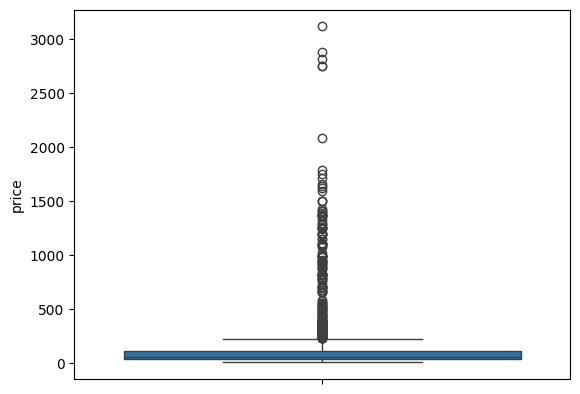

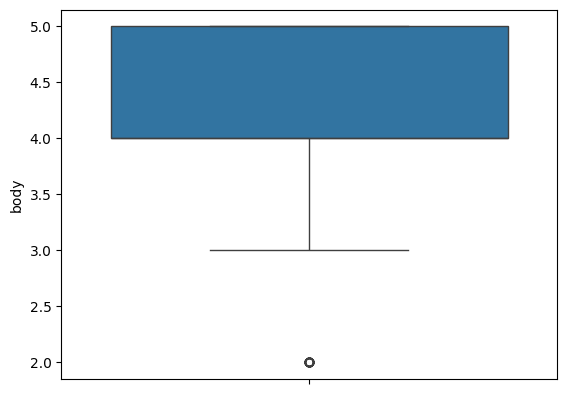

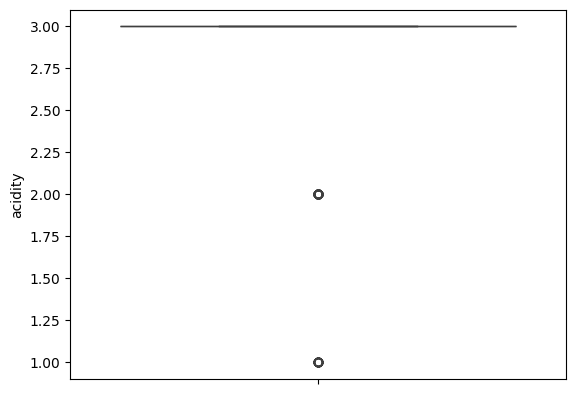

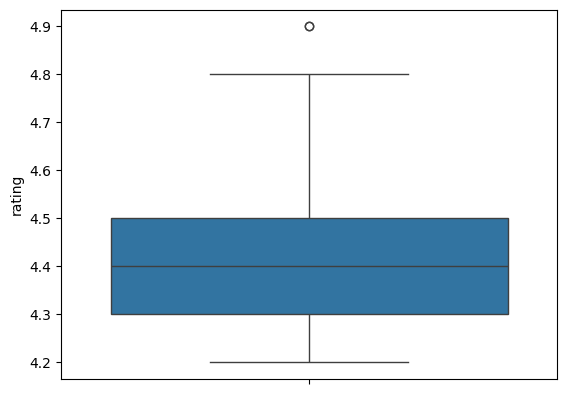

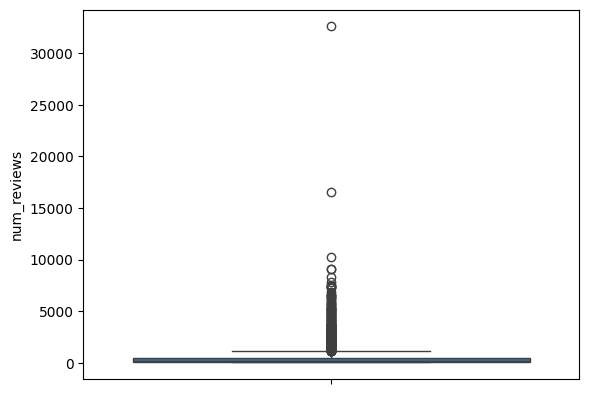

In [50]:
sns.boxplot(df['price'])
plt.show()
sns.boxplot(df['body'])
plt.show()
sns.boxplot(df['acidity'])
plt.show()
sns.boxplot(df['rating'])
plt.show()
sns.boxplot(df['num_reviews'])
plt.show()

<Axes: ylabel='price'>

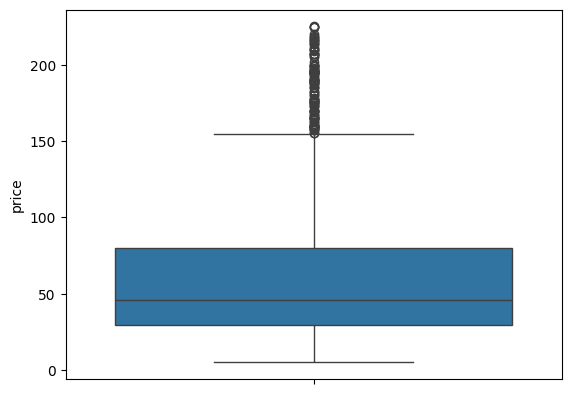

In [51]:
df1=df.copy()
Q1 = df1['price'].quantile(0.25)
Q3 = df1['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df2 = df1[(df1['price'] >= lower_bound) & (df1['price'] <= upper_bound)]
sns.boxplot(df2['price'])

<ipython-input-52-2424203878>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['log_price'] = np.log1p(df2['price'])          # log(1 + price)


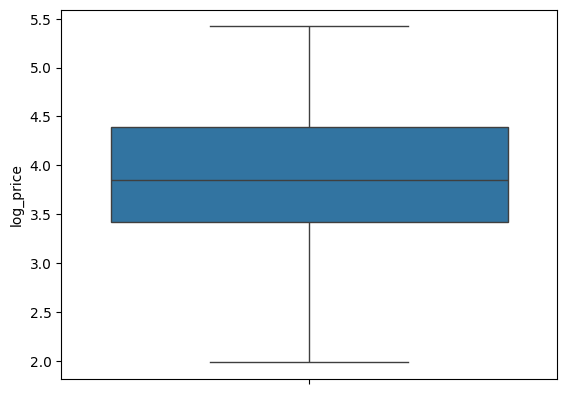

In [52]:
df2['log_price'] = np.log1p(df2['price'])          # log(1 + price)

Q1 = df2['log_price'].quantile(0.25)
Q3 = df2['log_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df3 = df2[(df2['log_price'] >= lower_bound) & (df2['log_price'] <= upper_bound)]
sns.boxplot(df3['log_price'])
plt.show()

<ipython-input-60-3270997820>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['log_reviews'] = np.log1p(df3['num_reviews'])  # log(1 + reviews)


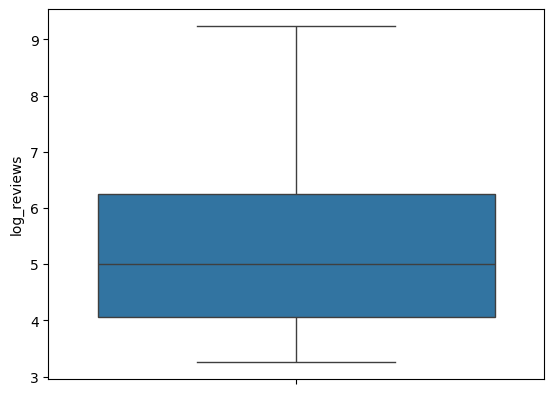

In [60]:
df3['log_reviews'] = np.log1p(df3['num_reviews'])  # log(1 + reviews)
Q1 = df3['log_reviews'].quantile(0.25)
Q3 = df3['log_reviews'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df3 = df3[(df3['log_reviews'] >= lower_bound) & (df3['log_reviews'] <= upper_bound)]
sns.boxplot(df3['log_reviews'])
plt.show()

#Encoding Relevant Categorical Variables

In [61]:
df3 = pd.get_dummies(df3, columns=['type'], drop_first=True)
region_counts = df3['region'].value_counts()
rare_regions = region_counts[region_counts < 20].index

df3['region'] = df3['region'].apply(lambda x: 'Other' if x in rare_regions else x)
df3 = pd.get_dummies(df3, columns=['region'], drop_first=True)
df3

KeyError: "None of [Index(['type'], dtype='object')] are in the [columns]"

#Try Binning method if time is extra

In [15]:
# function to map rating to quality classes
def map_quality(rating):
    if rating >= 4.8:
        return "Outstanding"
    elif rating >= 4.6:
        return "Excellent"
    elif rating >= 4.4:
        return "Good"
    elif rating >= 4.2:
        return "Average"
    else:
        return "Poor"

# Applying this function to create a new column
df3['quality_class'] = df3['rating'].apply(map_quality)

#  Checking how many samples are in each class
print(df3['quality_class'].value_counts())


quality_class
Average        898
Good           712
Excellent      171
Outstanding      4
Name: count, dtype: int64


<ipython-input-15-1316902870>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['quality_class'] = df3['rating'].apply(map_quality)


In [64]:
quality_mapping = {
    "Poor": 0,
    "Average": 1,
    "Good": 2,
    "Excellent": 3,
    "Outstanding": 4
}
df3['quality_label'] = df3['quality_class'].map(quality_mapping)

#Visualization

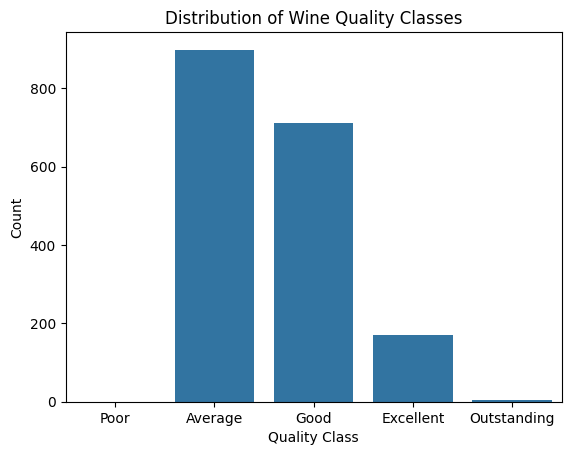

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='quality_class', data=df3, order=["Poor", "Average", "Good", "Excellent", "Outstanding"])
plt.title("Distribution of Wine Quality Classes")
plt.xlabel("Quality Class")
plt.ylabel("Count")
plt.show()

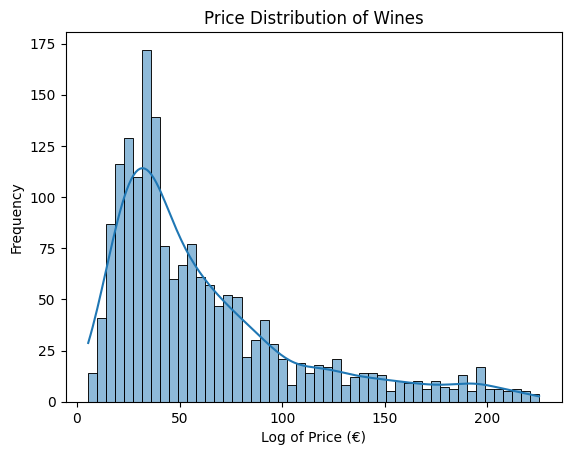

In [21]:
sns.histplot(df3['price'], kde=True, bins=50)
plt.title("Price Distribution of Wines")
plt.xlabel("Log of Price (€)")
plt.ylabel("Frequency")
plt.show()


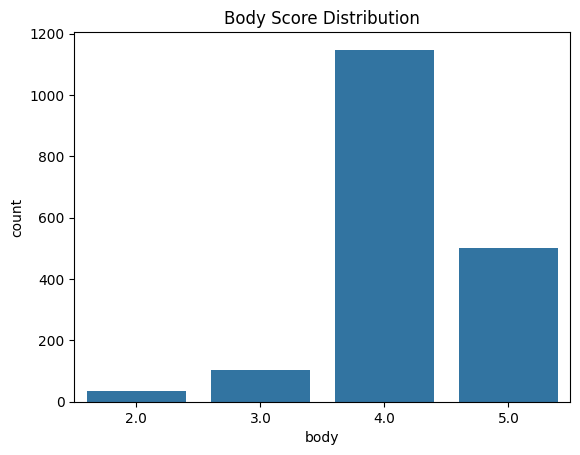

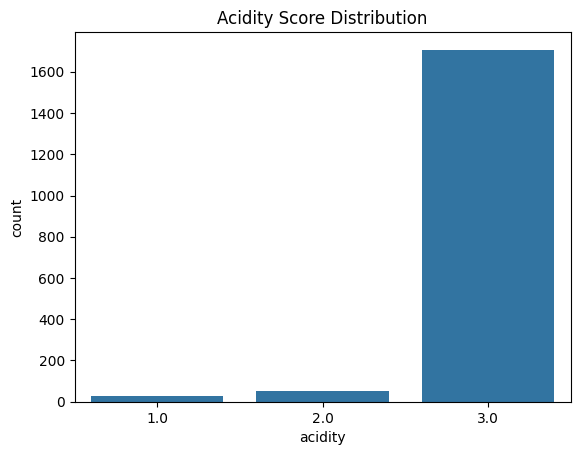

In [27]:
sns.countplot(x='body', data=df3)
plt.title("Body Score Distribution")
plt.show()
sns.countplot(x='acidity', data=df3)
plt.title("Acidity Score Distribution")
plt.show()

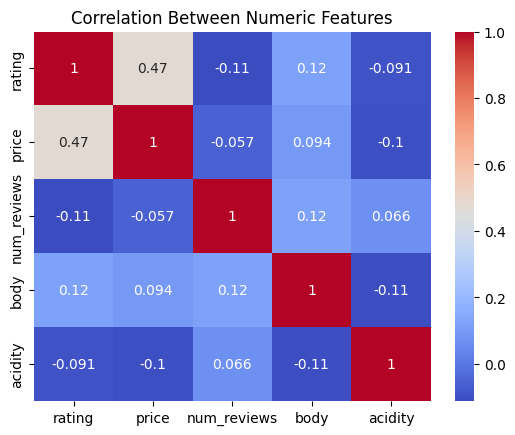

In [46]:
numeric_cols = ['rating', 'price', 'num_reviews', 'body', 'acidity']
corr = df3[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Features")
plt.show()

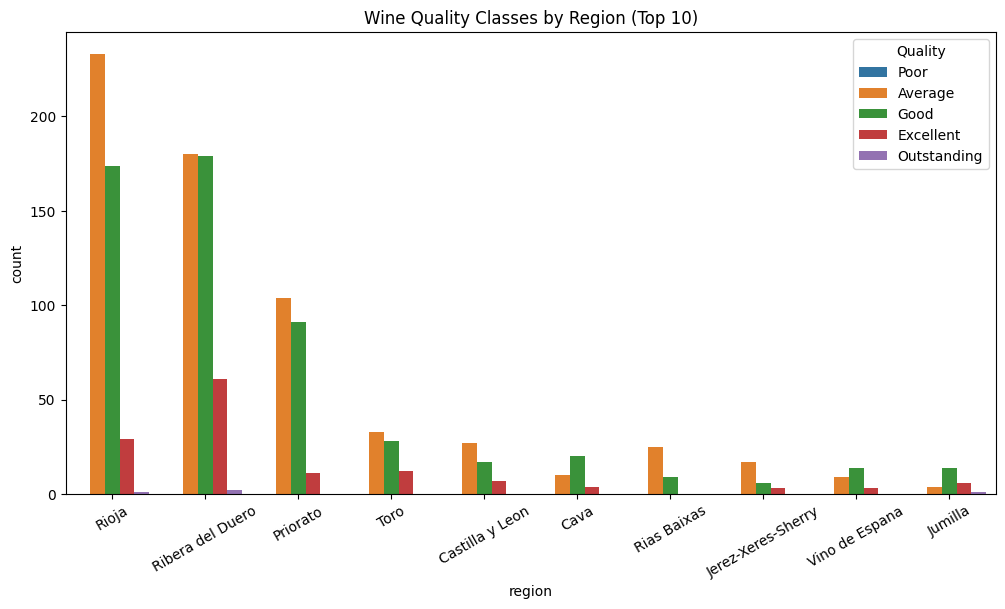

In [36]:
top_regions = df3['region'].value_counts().nlargest(10).index
df3_region_top = df3[df3['region'].isin(top_regions)]

plt.figure(figsize=(12, 6))
sns.countplot(data=df3_region_top, x='region', hue='quality_class',
              order=top_regions, hue_order=["Poor", "Average", "Good", "Excellent", "Outstanding"])
plt.title("Wine Quality Classes by Region (Top 10)")
plt.xticks(rotation=30)
plt.legend(title="Quality")
plt.show()

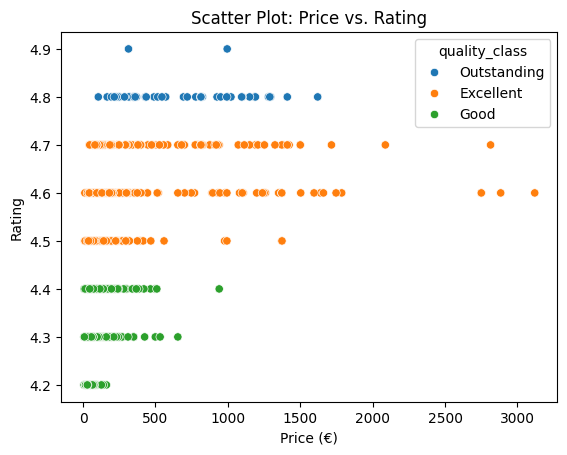

In [47]:
sns.scatterplot(x='price', y='rating', hue='quality_class',data=df)
plt.title("Scatter Plot: Price vs. Rating")
plt.xlabel("Price (€)")
plt.ylabel("Rating")
plt.show()


#MODELLING

#Baseline model

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# X = features, y = labels
X = df3.drop(['quality_class', 'quality_label'], axis=1)  # drop target columns
y = df3['quality_label']  # encoded labels

# Train-test split (stratified to preserve class distribution)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Baseline model
baseline_model = RandomForestClassifier(random_state=42)
baseline_model.fit(X_train, y_train)

# Predictions
y_pred = baseline_model.predict(X_test)

# Evaluation
print("Baseline Model Performance:\n")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Baseline Model Performance:

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       272
           3       0.99      1.00      0.99        84
           4       0.00      0.00      0.00         1

    accuracy                           1.00       357
   macro avg       0.66      0.67      0.66       357
weighted avg       0.99      1.00      1.00       357

Confusion Matrix:
 [[272   0   0]
 [  0  84   0]
 [  0   1   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# X = features, y = labels
# Identify any remaining non-numeric columns that are not target variables
non_numeric_cols = df3.select_dtypes(include='object').columns
# Drop any remaining object columns from the features, ensuring not to drop the target
cols_to_drop_from_X = ['quality_class', 'quality_label'] + list(non_numeric_cols)
X = df3.drop(columns=cols_to_drop_from_X, axis=1, errors='ignore') # drop target and any remaining object columns

y = df3['quality_label']  # encoded labels

# Train-test split (stratified to preserve class distribution)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Verify X_train contains only numeric columns
print("Data types in X_train before training:")
print(X_train.dtypes)

# Baseline model
baseline_model = RandomForestClassifier(random_state=42)
baseline_model.fit(X_train, y_train)

# Predictions
y_pred = baseline_model.predict(X_test)

# Evaluation
print("\nBaseline Model Performance:\n")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Data types in X_train before training:
year                         float64
rating                       float64
num_reviews                    int64
price                        float64
body                         float64
acidity                      float64
type_Cabernet Sauvignon         bool
type_Cava                       bool
type_Chardonnay                 bool
type_Grenache                   bool
type_Mencia                     bool
type_Monastrell                 bool
type_Montsant Red               bool
type_Pedro Ximenez              bool
type_Priorat Red                bool
type_Red                        bool
type_Ribera Del Duero Red       bool
type_Rioja Red                  bool
type_Rioja White                bool
type_Sauvignon Blanc            bool
type_Sherry                     bool
type_Sparkling                  bool
type_Syrah                      bool
type_Tempranillo                bool
type_Toro Red                   bool
type_Verdejo                    bool

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Tuned Model

In [68]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Model + random search
tuned_model = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_distributions=param_dist,
    n_iter=20,  # number of combinations to try
    cv=5,
    scoring='f1_macro',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

tuned_model.fit(X_train, y_train)

# Best model prediction
y_tuned_pred = tuned_model.predict(X_test)

# Evaluation
print("Tuned Model Performance:\n")
print(classification_report(y_test, y_tuned_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_tuned_pred))

# Best parameters
print("Best Hyperparameters:\n", tuned_model.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Tuned Model Performance:

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       272
           3       0.99      1.00      0.99        84
           4       0.00      0.00      0.00         1

    accuracy                           1.00       357
   macro avg       0.66      0.67      0.66       357
weighted avg       0.99      1.00      1.00       357

Confusion Matrix:
 [[272   0   0]
 [  0  84   0]
 [  0   1   0]]
Best Hyperparameters:
 {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30}


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.linear_model import LogisticRegression

# Multinomial setting for multi-class classification
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate
print("Logistic Regression:\n")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression:

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       273
           3       1.00      1.00      1.00        84

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357

Confusion Matrix:
 [[273   0]
 [  0  84]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix



# X = features, y = labels
# Identify any remaining non-numeric columns that are not target variables
non_numeric_cols = df3.select_dtypes(include='object').columns
# Drop any remaining object columns from the features, ensuring not to drop the target
cols_to_drop_from_X = ['quality_class', 'quality_label'] + list(non_numeric_cols)
X = df3.drop(columns=cols_to_drop_from_X, axis=1, errors='ignore') # drop target and any remaining object columns

y = df3['quality_label']  # encoded labels

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Initialize model with default settings
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluate
print("Decision Tree Classifier:\n")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Classifier:

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       273
           3       1.00      1.00      1.00        84

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357

Confusion Matrix:
 [[273   0]
 [  0  84]]


In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_dt = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize model
dt = DecisionTreeClassifier(random_state=42)

# Grid search
grid_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt,
                       cv=5, scoring='f1_macro', verbose=1, n_jobs=-1)

grid_dt.fit(X_train, y_train)

# Predictions
y_pred_dt = grid_dt.predict(X_test)

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix
print("Best Params (Decision Tree):", grid_dt.best_params_)
print("Tuned Decision Tree Performance:\n")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Params (Decision Tree): {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Tuned Decision Tree Performance:

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       273
           3       1.00      1.00      1.00        84

    accuracy                           1.00       357
   macro avg       1.00      1.00      1.00       357
weighted avg       1.00      1.00      1.00       357

Confusion Matrix:
 [[273   0]
 [  0  84]]


In [72]:
from sklearn.linear_model import LogisticRegression

# Define grid
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],           # Regularization strength
    'solver': ['lbfgs', 'saga'],            # Good for multinomial
    'multi_class': ['multinomial']
}

# Initialize model
lr = LogisticRegression(max_iter=1000)

# Grid search
grid_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr,
                       cv=5, scoring='f1_macro', verbose=1, n_jobs=-1)

# Don't forget to scale your features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

grid_lr.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = grid_lr.predict(X_test_scaled)

# Evaluation
print("Best Params (Logistic Regression):", grid_lr.best_params_)
print("Tuned Logistic Regression Performance:\n")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Params (Logistic Regression): {'C': 100, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
Tuned Logistic Regression Performance:

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       273
           3       1.00      0.99      0.99        84
           4       0.00      0.00      0.00         0

    accuracy                           1.00       357
   macro avg       0.67      0.66      0.66       357
weighted avg       1.00      1.00      1.00       357

Confusion Matrix:
 [[273   0   0]
 [  0  83   1]
 [  0   0   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricW